In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

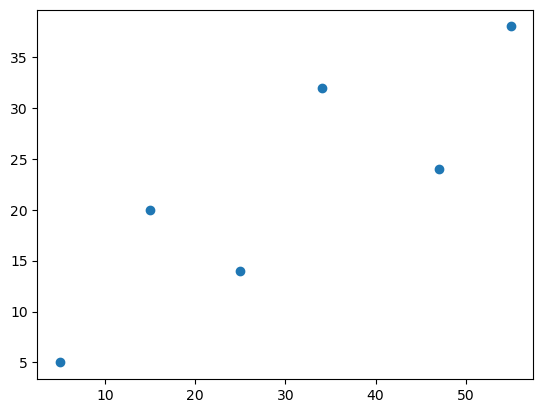

In [3]:
x = np.array([5,15,25,34,47,55]).reshape((-1,1))
y = np.array([5,20,14,32,24,38])

plt.scatter(x,y)
plt.show()

In [5]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [7]:
model = LinearRegression().fit(x,y)

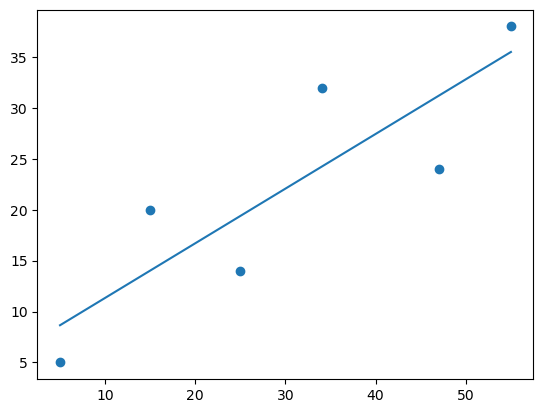

In [11]:
y_pred = model.predict(x)
y_pred = model.intercept_ + model.coef_*x
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.show()

In [15]:
model.score(x,y)

0.5336220545787319

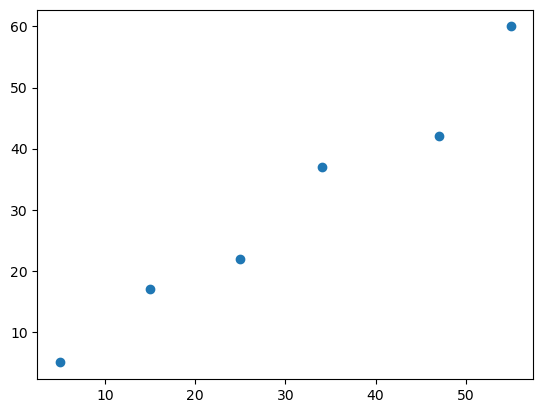

In [13]:
x = np.array([5,15,25,34,47,55]).reshape((-1,1))
y = np.array([5,17,22,37,42,60])

plt.scatter(x,y)
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
x_ = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_,y)


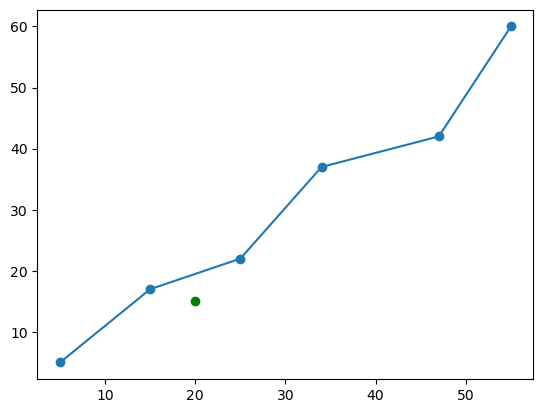

In [31]:
y_pred = model.predict(x_)
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.scatter([20],[15],c='green')
plt.show()

# Overfitting

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=45676)


In [44]:
x.shape

(6, 1)

In [46]:
x_train.shape

(5, 1)

In [48]:
x_test.shape

(1, 1)

In [50]:
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [64]:
np.random.seed(546)
X=np.linspace(0,10,100).reshape(-1,1)
y = 3*X.squeeze() + 5 + np.random.randn(100)*3

X.shape

(100, 1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45676)

In [82]:
model=Ridge(alpha=1000)
model.fit(X_train,y_train)

Ridge(alpha=1000)

In [84]:
y_pred = model.predict(X_test)



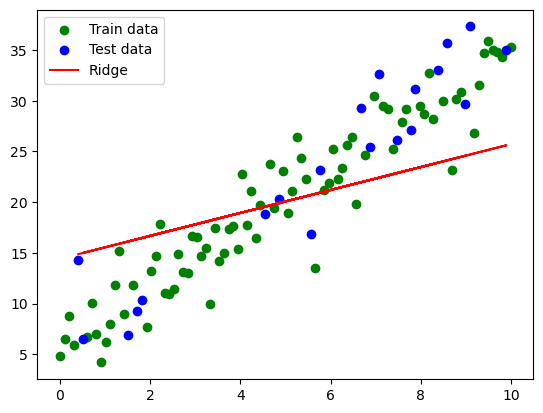

In [86]:
plt.scatter(X_train,y_train,color='green',label='Train data')
plt.scatter(X_test,y_test,color='blue',label='Test data')
plt.plot(X_test,y_pred,label='Ridge',color='red')
plt.legend()
plt.show()

In [92]:
y_pred_train = model.predict(X_train)
mean_squared_error(y_train,y_pred_train)

31.534692905144368

In [94]:

mean_squared_error(y_test,y_pred)

50.66147222845285

# Classification

In [106]:
import pandas as pd
import seaborn as sb


In [166]:
iris = pd.read_csv('iris.csv')

In [168]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: title={'center': 'Petal'}, xlabel='petal_length', ylabel='petal_width'>

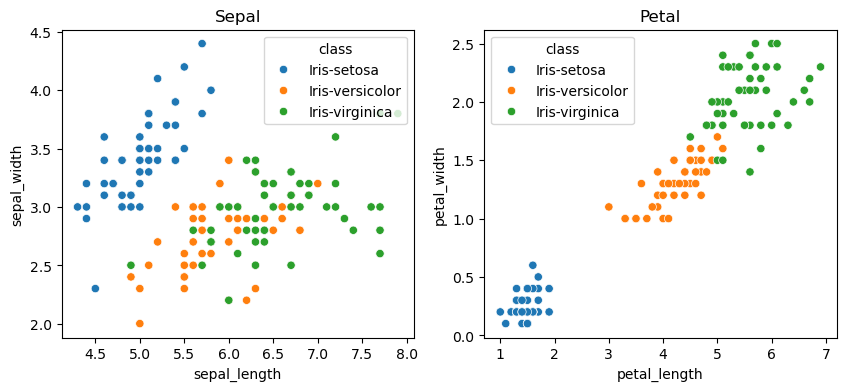

In [170]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].set_title('Sepal')
axes[1].set_title('Petal')
sb.scatterplot(iris,x='sepal_length',y='sepal_width',hue='class',ax=axes[0])
sb.scatterplot(iris,x='petal_length',y='petal_width',hue='class',ax=axes[1])

In [172]:
features = iris.columns.drop('class')

In [174]:
features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [176]:
target = 'class'
X, Y = iris[features], iris[target]

In [178]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=45676)

In [182]:
from sklearn.preprocessing import LabelEncoder

In [184]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [186]:
le.transform(y_train)

array([1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0,
       0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 0, 0, 1])

In [188]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_st = scaler.transform(X_train)
x_test_st = scaler.transform(X_test)

In [209]:
x_train_st.shape

(120, 4)

In [211]:
x_train.shape

(5, 1)

In [213]:
from sklearn import svm

In [217]:
model = svm.SVC()
model.fit(x_train_st, y_train)

SVC()

In [227]:
y_pred = model.predict(x_test_st) ## prediction

In [229]:
y_test ## truth

array([2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 1])

In [231]:
from sklearn.metrics import confusion_matrix

In [239]:
cm = confusion_matrix(y_test,y_pred)
class_names = ['setosa','versicolor','virginica']

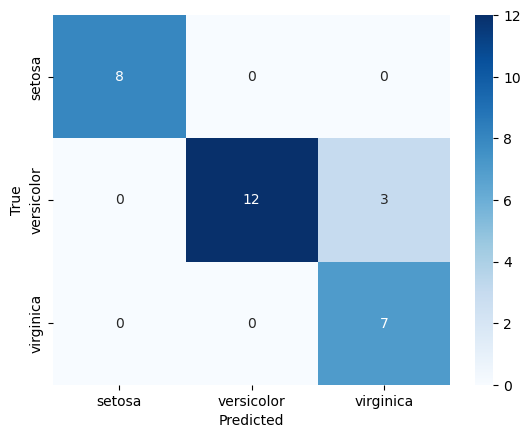

In [243]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [245]:
from sklearn.tree import DecisionTreeClassifier

In [249]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=24546)

In [251]:
model.fit(x_train_st,y_train)

DecisionTreeClassifier(max_depth=3, random_state=24546)

In [255]:
y_pred = model.predict(x_test_st)

In [257]:
cm = confusion_matrix(y_test,y_pred)

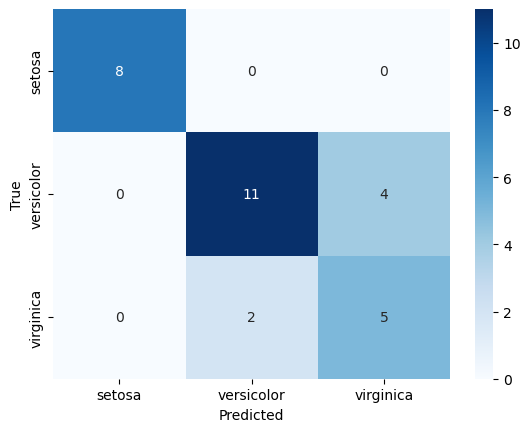

In [259]:
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [1]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / np.sum(e_x)

# Simulate input logits for 3 classes
logits = np.linspace(-2, 2, 100)
class1 = logits
class2 = logits + 1.0  # Shifted to show class preference
class3 = logits - 1.0

# Stack into a matrix for multiple input vectors
logits_matrix = np.vstack([class1, class2, class3])

# Apply softmax across each input set (axis=0: each column is one input set)
softmax_outputs = np.apply_along_axis(softmax, 0, logits_matrix)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(logits, softmax_outputs[0], label="Class 1")
plt.plot(logits, softmax_outputs[1], label="Class 2")
plt.plot(logits, softmax_outputs[2], label="Class 3")

plt.title("Softmax Function Output Across Classes")
plt.xlabel("Logit Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'np' is not defined